In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [3]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df_result = df.groupby(['target', 'cluster'])['sepal_length'].count()
print(df_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

df['pca_x'] = pca_transformed[:,0]
df['pca_y']= pca_transformed[:, 1]
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


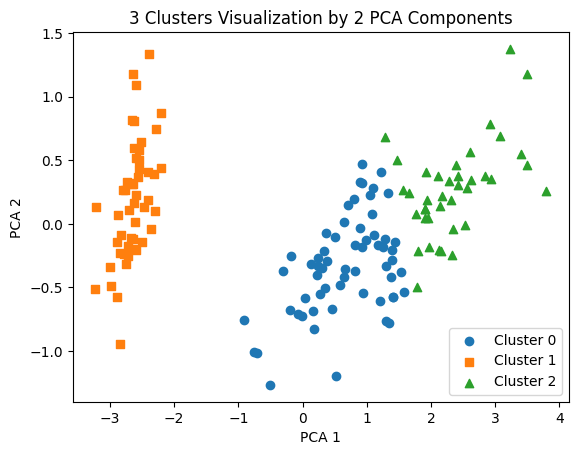

In [5]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = df[df['cluster'] == 0].index
marker1_ind = df[df['cluster'] == 1].index
marker2_ind = df[df['cluster'] == 2].index

plt.scatter(x=df.loc[marker0_ind, 'pca_x'], y=df.loc[marker0_ind, 'pca_y'], marker='o',label='Cluster 0')

plt.scatter(
    x=df.loc[marker1_ind, 'pca_x'],
    y=df.loc[marker1_ind, 'pca_y'],
    marker='s',
    label='Cluster 1'
)

plt.scatter(
    x=df.loc[marker2_ind, 'pca_x'],
    y=df.loc[marker2_ind, 'pca_y'],
    marker='^',
    label='Cluster 2'
)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.legend()
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [7]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

clusterDF.head(3)


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


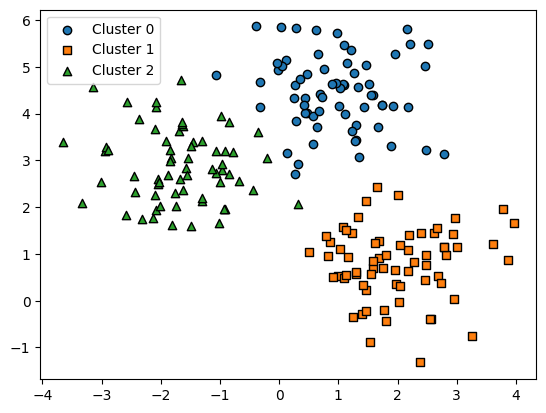

In [8]:
import numpy as np
import matplotlib.pyplot as plt

target_list = np.unique(y)

# 각 타깃별 산점도 마커
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# target_list = [0,1,2]라면 군집 3개
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]

    plt.scatter(
        x=target_cluster['ftr1'],
        y=target_cluster['ftr2'],
        edgecolor='k',
        marker=markers[target],
        label=f"Cluster {target}"
    )

plt.legend()
plt.show()


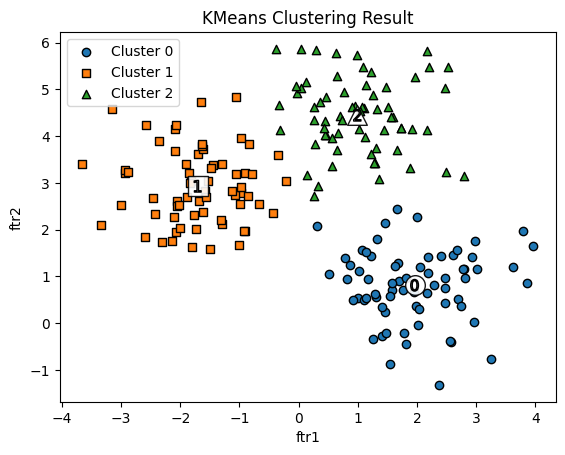

In [9]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# KMeans 모델 생성 및 학습
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',   # ← 올바른 옵션
    max_iter=200,
    random_state=0
)

cluster_labels = kmeans.fit_predict(X)

# 결과를 DataFrame에 저장
clusterDF['kmeans_label'] = cluster_labels

# 클러스터 중심
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]

    plt.scatter(
        x=label_cluster['ftr1'],
        y=label_cluster['ftr2'],
        edgecolor='k',
        marker=markers[label],
        label=f"Cluster {label}"
    )

    plt.scatter(
        x=center_x_y[0],
        y=center_x_y[1],
        s=200,
        color='white',
        alpha=0.9,
        edgecolor='k',
        marker=markers[label]
    )

    plt.scatter(
        x=center_x_y[0],
        y=center_x_y[1],
        s=70,
        color='none',
        edgecolor='k',
        marker='$%d$' % label   # 텍스트 마커
    )

plt.legend()
plt.title("KMeans Clustering Result")
plt.xlabel("ftr1")
plt.ylabel("ftr2")
plt.show()


In [10]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=300,
    random_state=0
).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape:', score_samples.shape)

irisDF['silhouette_coef'] = score_samples

average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {:.3f}'.format(average_score))

irisDF.head(3)


silhouette_samples() return 값의 shape: (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coef
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [12]:
irisDF.groupby('cluster')['silhouette_coef'].mean()

,silhouette_coef
cluster,
0,0.422323
1,0.797604
2,0.436842


In [13]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

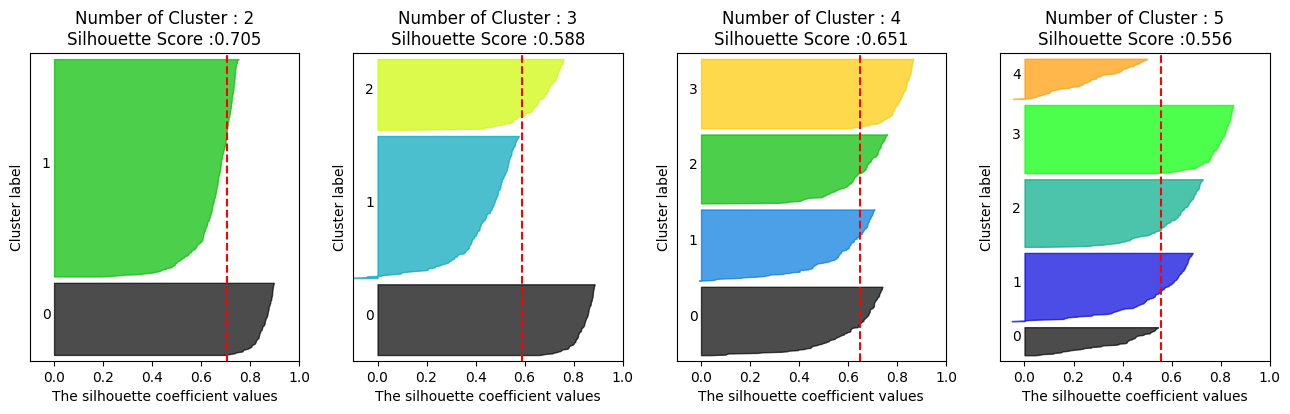

In [14]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                   center_box=(-10.0, 10.0), shuffle=True, random_state=1)
 # 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([ 2, 3, 4, 5], X)

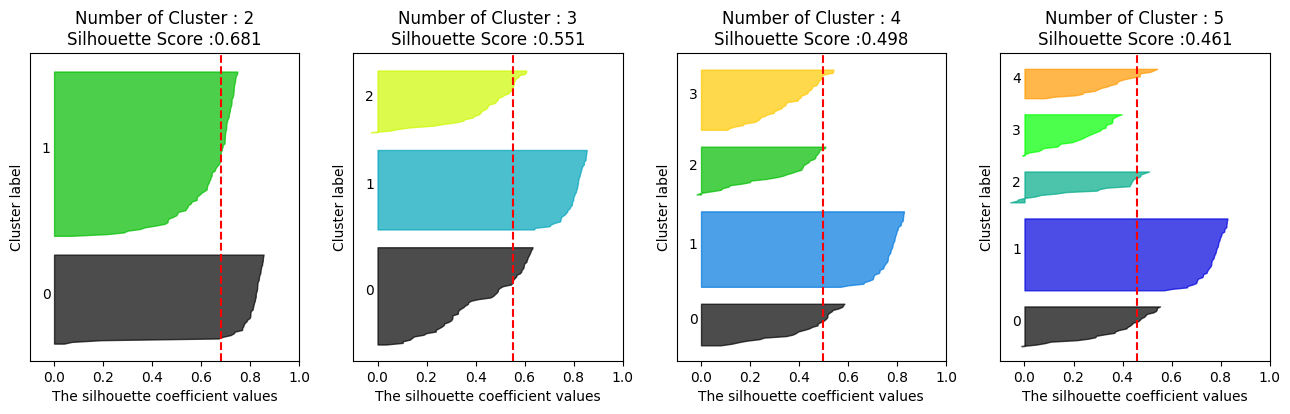

In [15]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([ 2, 3, 4, 5 ], iris.data)

In [16]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=3,
    cluster_std=0.7,
    random_state=0
)

meanshift = MeanShift(bandwidth=0.8)

cluster_labels = meanshift.fit_predict(X)

print("cluster labels 유형:", np.unique(cluster_labels))


cluster labels 유형: [0 1 2 3 4 5]


In [17]:
meanshift = MeanShift(bandwidth=1)

cluster_labels = meanshift.fit_predict(X)

print("cluster labels 유형:", np.unique(cluster_labels))


cluster labels 유형: [0 1 2]


In [18]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)

print("bandwidth 값:", round(bandwidth, 3))


bandwidth 값: 1.816


In [19]:
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)

cluster_labels = meanshift.fit_predict(X)

print("cluster labels 유형:", np.unique(cluster_labels))


cluster labels 유형: [0 1 2]


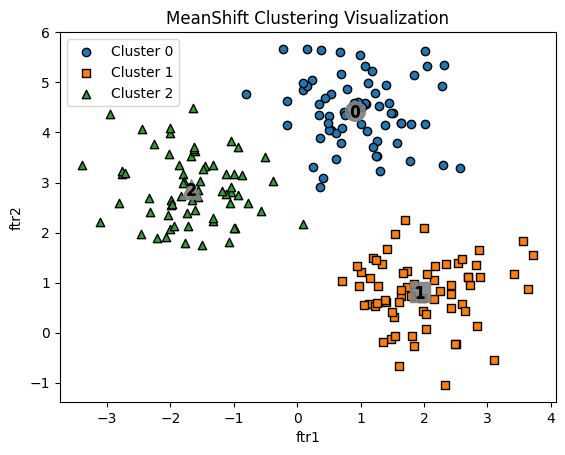

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels

centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'x', '*', 'D']

for label in unique_labels:
    label_cluster = clusterDF[ clusterDF['meanshift_label'] == label ]
    center_x_y = centers[label]

    plt.scatter(
        x=label_cluster['ftr1'],
        y=label_cluster['ftr2'],
        edgecolor='k',
        marker=markers[label],
        label=f"Cluster {label}"
    )

    plt.scatter(
        x=center_x_y[0],
        y=center_x_y[1],
        s=200,
        color='gray',
        alpha=0.9,
        marker=markers[label]
    )

    plt.scatter(
        x=center_x_y[0],
        y=center_x_y[1],
        s=70,
        color='k',
        edgecolor='k',
        marker='$%d$' % label
    )

plt.title("MeanShift Clustering Visualization")
plt.xlabel("ftr1")
plt.ylabel("ftr2")
plt.legend()
plt.show()


In [21]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())


target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


In [22]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [23]:
from sklearn.mixture import GaussianMixture
import pandas as pd

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)

gmm_cluster_labels = gmm.predict(iris.data)

irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['gmm_cluster'].value_counts()

print(iris_result)


target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=300,
    random_state=0
).fit(iris.data)

kmeans_cluster_labels = kmeans.predict(iris.data)

irisDF['kmeans_cluster'] = kmeans_cluster_labels

iris_result = irisDF.groupby('target')['kmeans_cluster'].value_counts()

print(iris_result)


target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


In [25]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):

    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_

    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)

    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]

        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)

        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)

    if isNoise:
        legend_loc='upper center'
    else:
        legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

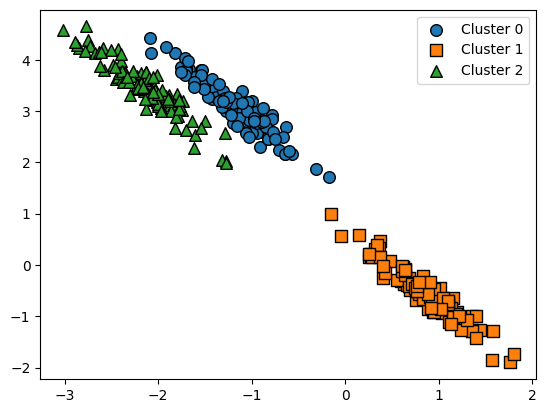

In [26]:
from sklearn.datasets import make_blobs

# make_blobs로 300개 데이터, 3개 군집 생성
X, y = make_blobs(
    n_samples=300,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    random_state=0
)

transformation = np.array([
    [0.60834549, -0.63667341],
    [-0.40887718,  0.85253229]
])

X_aniso = np.dot(X, transformation)

clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


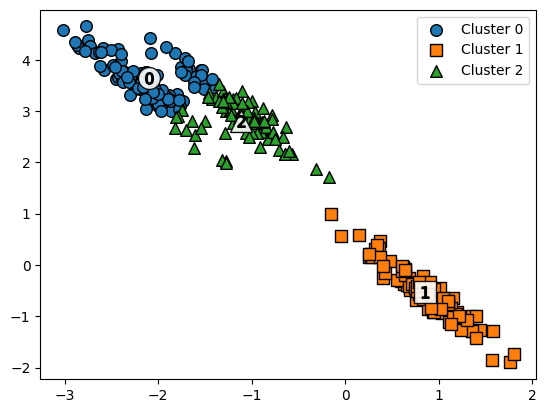

In [27]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)


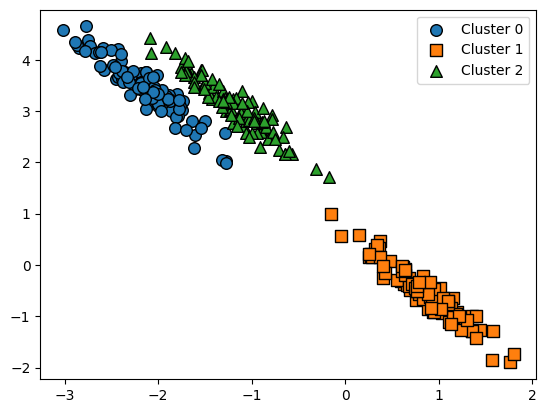

In [28]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)

clusterDF['gmm_label'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)


In [29]:
print("### KMeans Clustering ###")
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

print("\n### Gaussian Mixture Clustering ###")
print(clusterDF.groupby('target')['gmm_label'].value_counts())


### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


In [30]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()

print(iris_result)


target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


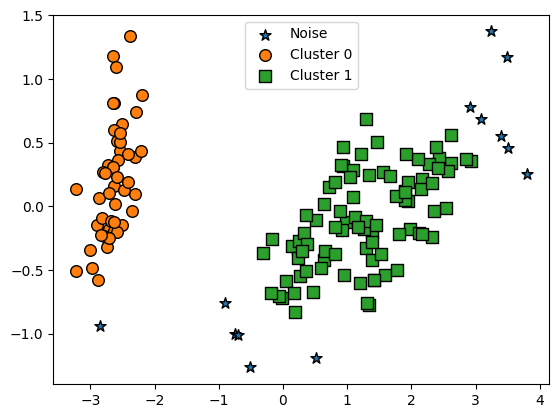

In [31]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


In [32]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_cluster_2d(df, label_col, centers=None, legend=True):
    """
    df        : DataFrame (ftr1, ftr2 존재)
    label_col : 군집 레이블 컬럼명
    centers   : (옵션) 군집 중심 좌표
    legend    : 범례 표시 여부
    """

    unique_labels = np.unique(df[label_col])
    markers = ['o', 's', '^', 'P', 'D', 'H', 'x', '*']

    plt.figure(figsize=(7, 6))

    # 군집별 점 찍기
    for label in unique_labels:
        label_df = df[df[label_col] == label]

        # 노이즈(-1)는 다른 색으로 처리
        if label == -1:
            marker = 'x'
            color = 'gray'
            cluster_name = f"Noise ({label})"
        else:
            marker = markers[label % len(markers)]
            color = None
            cluster_name = f"Cluster {label}"

        plt.scatter(
            label_df['ftr1'],
            label_df['ftr2'],
            marker=marker,
            edgecolor='k',
            color=color,
            s=60,
            label=cluster_name
        )

    # 군집 중심 표시 (KMeans일 때만 사용)
    if centers is not None:
        for idx, c in enumerate(centers):
            plt.scatter(
                c[0], c[1],
                s=200,
                color='yellow',
                edgecolor='k',
                marker='*'
            )

    if legend:
        plt.legend()

    plt.xlabel("ftr1")
    plt.ylabel("ftr2")
    plt.title(f"Cluster Visualization: {label_col}")
    plt.show()


target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


/tmp/ipython-input-2454876897.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


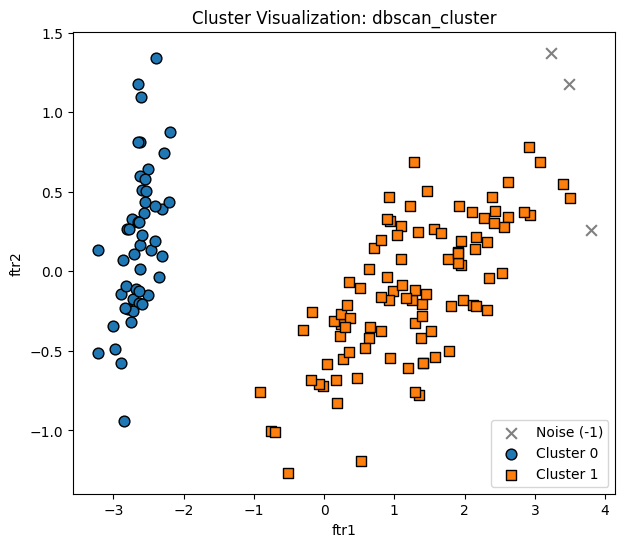

In [33]:
from sklearn.cluster import DBSCAN

# 군집화
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_2d(irisDF, 'dbscan_cluster', centers=None, legend=True)


In [34]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


/tmp/ipython-input-2454876897.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


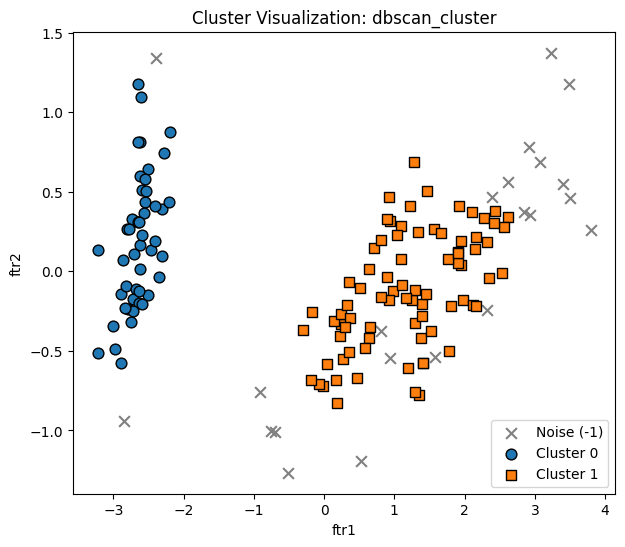

In [35]:
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_2d(irisDF, 'dbscan_cluster', centers=None, legend=True)


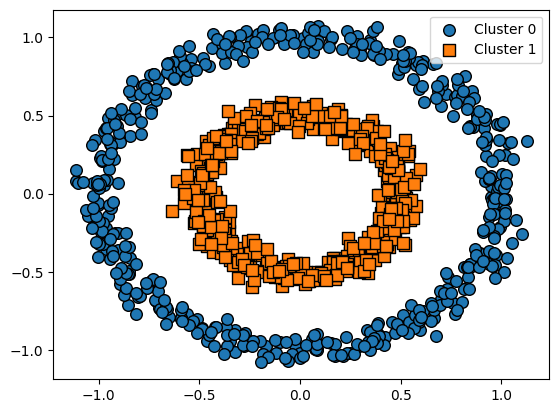

In [36]:
from sklearn.datasets import make_circles
import pandas as pd

X, y = make_circles(
    n_samples=1000,
    shuffle=True,
    noise=0.05,
    random_state=0,
    factor=0.5
)

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


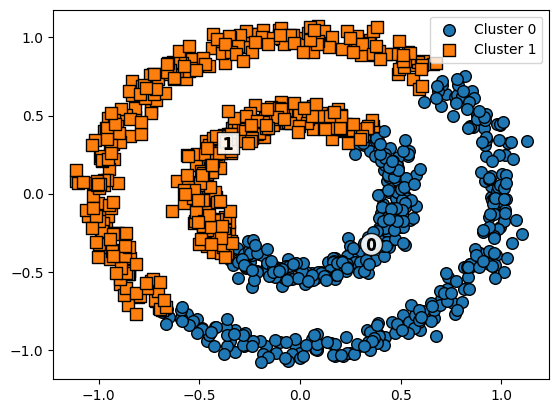

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


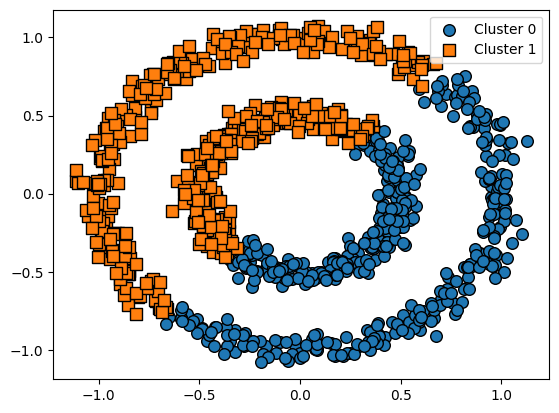

In [38]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)

clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)


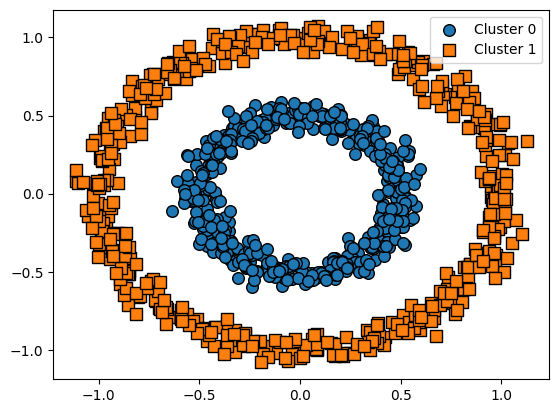

In [39]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)

clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)


In [40]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
retail_df = pd.read_excel("/content/drive/MyDrive/kaggle/Online Retail.xlsx")
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [41]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [42]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]

print(retail_df.shape)
retail_df.isnull().sum()


(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [43]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [44]:
retail_df = retail_df[retail_df['Country'] == 'United Kingdom']
print(retail_df.shape)


(354321, 8)


In [45]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)



In [46]:
print(retail_df['CustomerID'].value_counts().head(5))

print(
    retail_df.groupby('CustomerID')['sale_amount']
    .sum()
    .sort_values(ascending=False)[:5]
)


CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [47]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

In [48]:
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount': 'sum'
}

cust_df = retail_df.groupby('CustomerID').agg(aggregations)

cust_df = cust_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'sale_amount': 'Monetary'
})

cust_df = cust_df.reset_index()
cust_df.head(3)


,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [49]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days + 1)

print("cust_df 로우와 칼럼 건수는", cust_df.shape)
cust_df.head(3)


cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


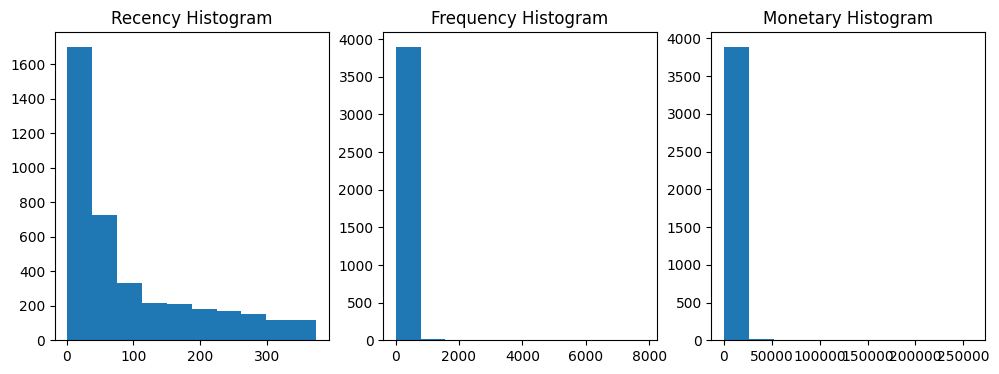

In [50]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

plt.show()


In [51]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()


,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)

cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))


실루엣 스코어는 : 0.576


In [53]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

def visualize_kmeans_plot_multi(cluster_list, X):
    """
    cluster_list : 사용할 K 개수 리스트 (예: [2,3,4,5])
    X : StandardScaler로 스케일링된 feature 데이터
    """

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    n_cols = len(cluster_list)
    fig, axs = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5))

    if len(cluster_list) == 1:
        axs = [axs]

    for idx, k in enumerate(cluster_list):
        ax = axs[idx]

        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit_predict(X)

        ax.scatter( X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis',s=30, edgecolor='k')

        # 중심 표시
        centers_pca = pca.transform(kmeans.cluster_centers_)
        ax.scatter(
            centers_pca[:, 0],
            centers_pca[:, 1],
            c='red',
            s=200,
            marker='X',
            edgecolor='k'
        )

        ax.set_title(f"K={k} Clustering")
        ax.set_xlabel("PCA 1")
        ax.set_ylabel("PCA 2")

    plt.tight_layout()
    plt.show()


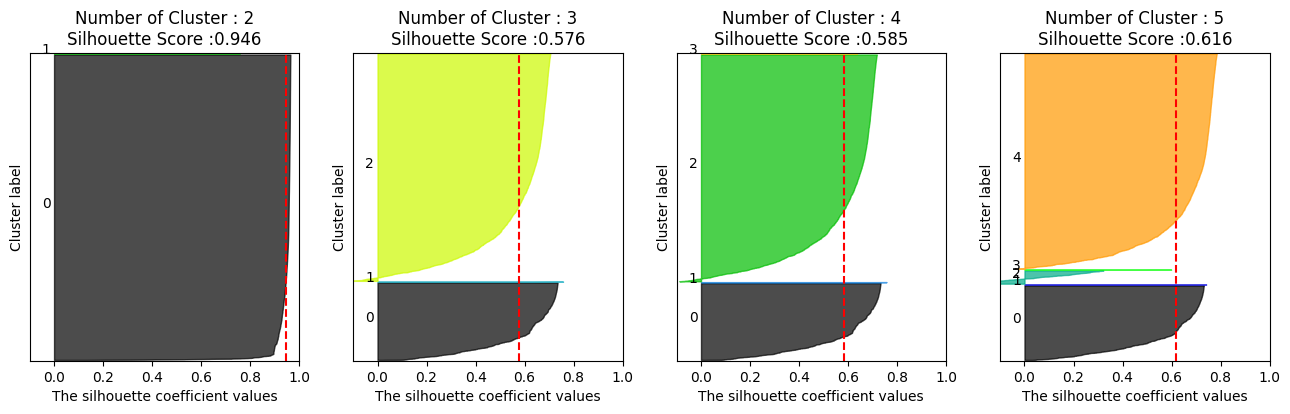

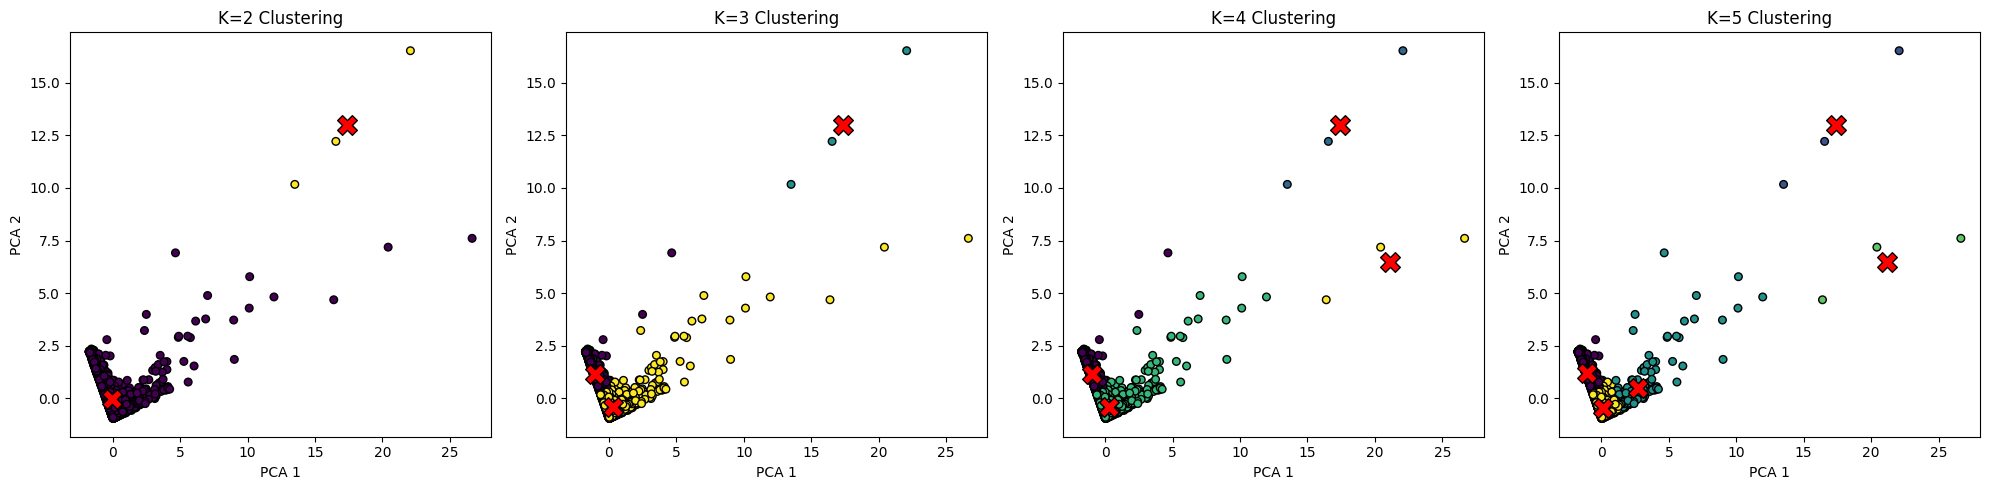

In [54]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 로그로 왜곡 줄이기
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)

cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))


실루엣 스코어는 : 0.303


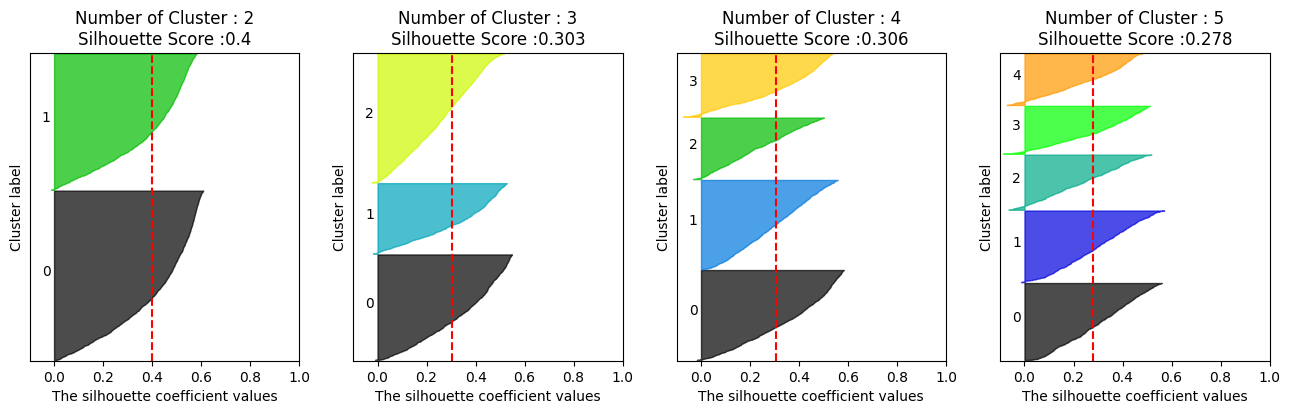

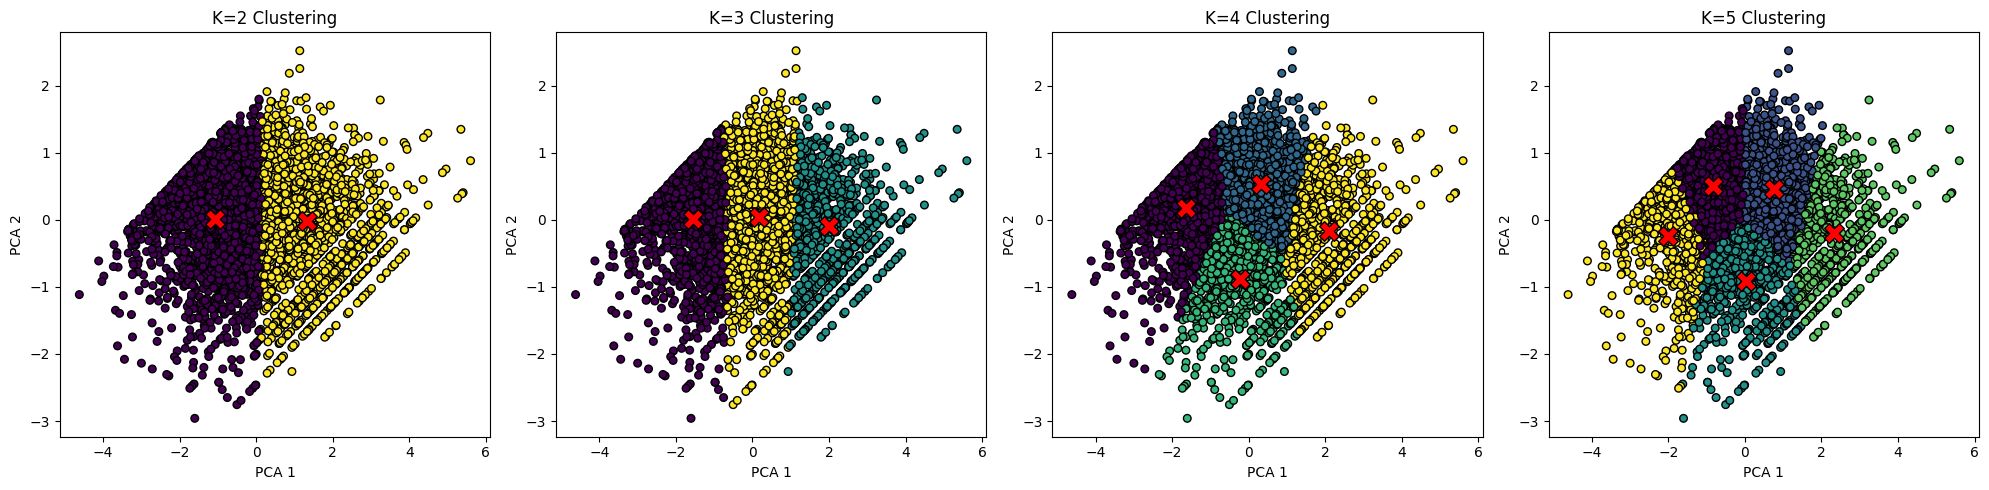

In [56]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)
